# Ex1
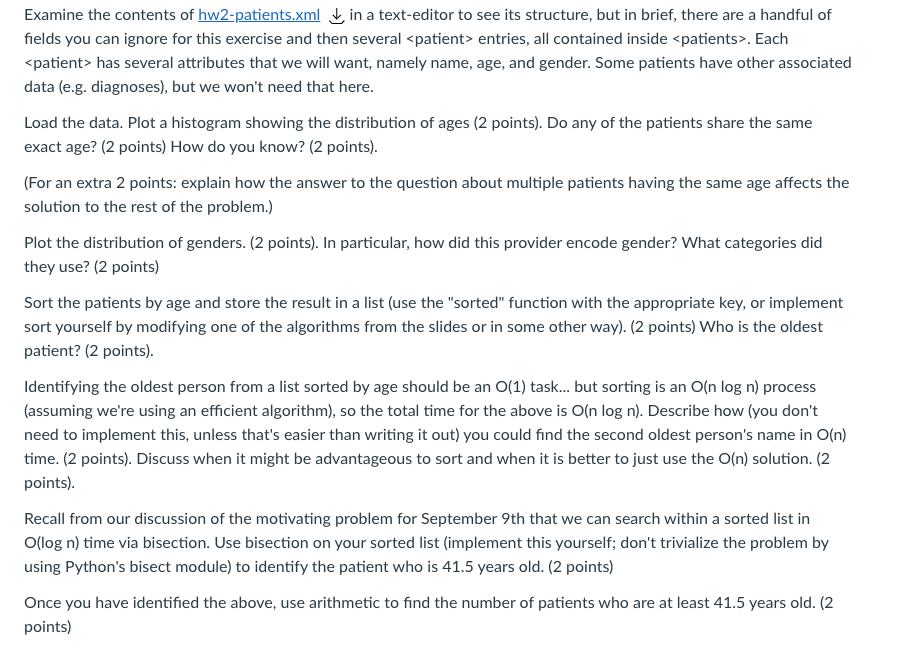
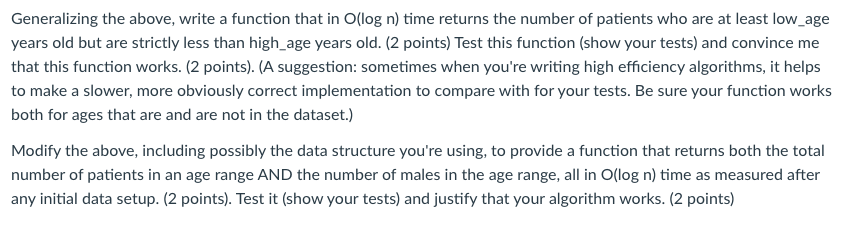

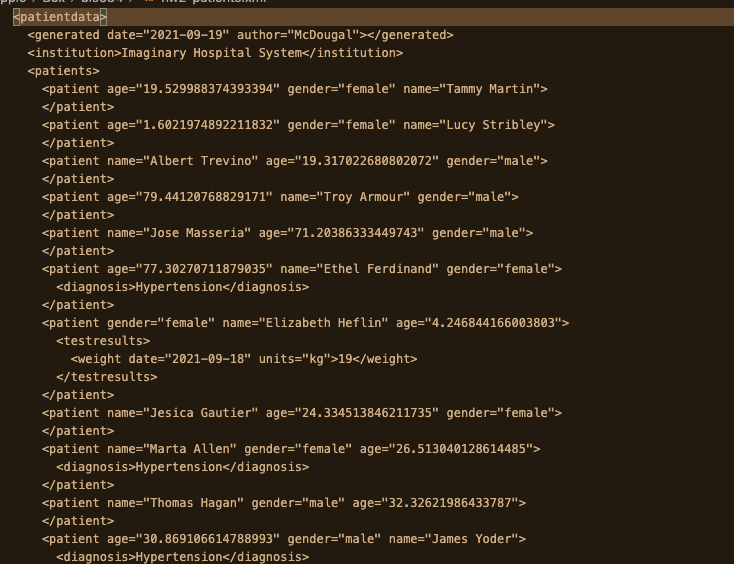

In [1]:
import xml.etree.cElementTree as ET

In [2]:
tree = ET.parse('hw2-patients.xml')
root = tree.getroot()

In [3]:
root.tag, root.attrib

('patientdata', {})

In [4]:
for child in root:
    print(child.tag, child.attrib)
#     break 

generated {'date': '2021-09-19', 'author': 'McDougal'}
institution {}
patients {}


In [5]:
name, age, gender = [], [], []


In [6]:
for patient in root.getchildren()[-1].findall('patient'):
    name.append(patient.attrib['name'])
    age.append(patient.attrib['age'])
    gender.append(patient.attrib['gender'])
    assert (len(name)==len(age) and len(age) == len(gender)), 'miss things'
        


    

/var/folders/rz/wj2pwbn164x144wk9djnk2840000gn/T/ipykernel_7199/3231334520.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  for patient in root.getchildren()[-1].findall('patient'):


In [7]:
len(name),len(age),len(gender)

(324357, 324357, 324357)

In [8]:
import pandas as pd

In [9]:
patient_tb = pd.DataFrame({'name':name, 'age':pd.to_numeric(age), 'gender': gender})

In [10]:
patient_tb

,name,age,gender
0,Tammy Martin,19.529988,female
1,Lucy Stribley,1.602197,female
2,Albert Trevino,19.317023,male
3,Troy Armour,79.441208,male
4,Jose Masseria,71.203863,male
...,...,...,...
324352,Jeremy Brode,60.955355,male
324353,Lynda Brown,22.676277,female
324354,Joyce Adkins,64.466378,female
324355,Kevin Hensley,56.770128,male


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  

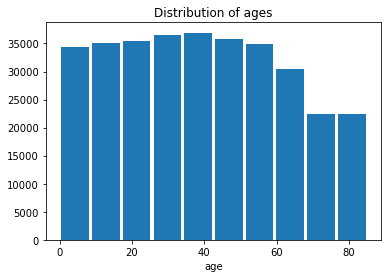

In [13]:
plt.hist(patient_tb['age'], rwidth = 0.9)
plt.title('Distribution of ages')
plt.xlabel('age')
plt.show()

/Applications/anaconda3/envs/IML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

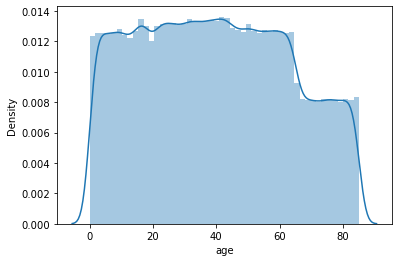

In [13]:
import seaborn as sn
sn.distplot(patient_tb['age'])

In [14]:
# do not share the same age
len(patient_tb['age'].unique())==len(patient_tb['age'])

True

<AxesSubplot:xlabel='gender', ylabel='Count'>

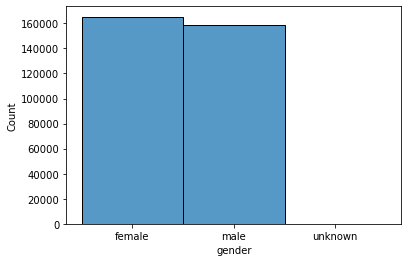

In [15]:
sn.histplot(patient_tb['gender'])

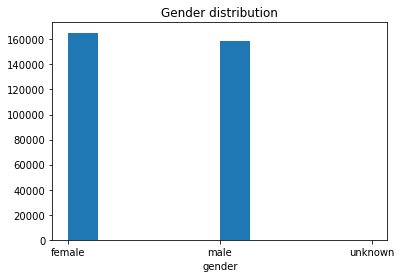

In [49]:
plt.hist(patient_tb['gender'])
plt.xlabel('gender')
plt.title('Gender distribution')
plt.show()

In [15]:
sorted_age = patient_tb.sort_values(by = 'age', ascending=False)
age_list = list(sorted_age['age'])

In [16]:
sorted_age

,name,age,gender
124560,Monica Caponera,84.998557,female
253020,Raymond Leigh,84.998293,male
183115,Tracy Walker,84.998202,female
218995,Michael Ali,84.997943,male
41737,Stephan Yeargin,84.997240,male
...,...,...,...
224761,Peter Blalock,0.002581,male
320248,Mauricio Pepin,0.002248,male
288755,Julia Clinton,0.001194,female
116120,Lisa Dercole,0.000861,female


In [17]:
sorted_age.iloc[0]

name      Monica Caponera
age             84.998557
gender             female
Name: 124560, dtype: object

In [18]:
max, snd_max = 0, 0
for i in patient_tb['age']:
    if i > max:
        max, snd_max = i, max
        
    elif i > snd_max and i < max:
        snd_max = i
print(max, snd_max)
    

84.99855742449432 84.9982928781625


In [19]:
patient_tb[patient_tb['age']==84.9982928781625]

,name,age,gender
253020,Raymond Leigh,84.998293,male


In [20]:
l, r = 0, len(age_list)
while l <= r :
    mid = int(l + (r-l)/2)
    if age_list[mid] == 41.5:
        break
    elif age_list[mid] < 41.5:
        r = mid - 1
    else:
        l = mid + 1
print(sorted_age.iloc[mid])

name      John Braswell
age                41.5
gender             male
Name: 939, dtype: object


In [21]:
mid+1

150471

In [36]:
np.max(age_list)

84.99855742449432

In [60]:
BinarySearch([4,3,2,1,1.5],9)

0

In [22]:
import numpy as np

In [87]:
def BinarySearch(arr, target):
    l, r = 0, len(arr)
    while l <= r :
        mid = int(l + (r-l)/2)
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            r = mid - 1
        else:
            l = mid + 1
    return mid
def age_scale_idf(age_list, high_age, low_age):
    """
    param: age_arr  list of sorted ages
    """
    # value check
    if low_age < np.min(age_list):
        low_age = np.min(age_list)
    if high_age <= low_age:
        raise ValueError('low should be smaller than high')
    
    # binary search
    high_bound = BinarySearch(age_list, high_age)
    low_bound = BinarySearch(age_list, low_age)
    
    if age_list[high_bound] >= high_age:
        high_bound +=1
    if age_list[low_bound] < low_age:
        low_bound -=1
    return low_bound-high_bound+1


def N_search_methd(age_list, high_age, low_age):
    
    # value check
    if high_age <= low_age:
        raise ValueError('low should be smaller than high')
    
    count = 0
    for i in age_list:
        if low_age <= i < high_age:
            count+=1
        elif i <  low_age:
            break
   
    return count
            


In [50]:
age_scale_idf(age_list, 40, 20)


85524

In [57]:
age_scale_idf(age_list, 100, 0) 

324357

In [90]:
        
for trial in range(10**3):
    random_Generator = 100*np.random.random(2)
    high_age, low_age = np.max(random_Generator), np.min(random_Generator)
    assert age_scale_idf(age_list, high_age, low_age) == N_search_methd(age_list, high_age, low_age), 'test failed'

print('1000 tests success')

    

1000 tests success


In [41]:
sorted_age['gender'].unique()

array(['female', 'male', 'unknown'], dtype=object)

In [74]:
def age_and_gender(data, low_age, high_age):
    
    data_notmale, data_male = data[data['gender']!='male'], data[data['gender'] == 'male']
    num_notmale, num_male = age_scale_idf(list(data_notmale['age']), high_age, low_age), age_scale_idf(list(data_male['age']), high_age, low_age)
    
    # algorithm check
    assert num_notmale == N_search_methd(list(data_notmale['age']), high_age, low_age) and num_male == N_search_methd(list(data_male['age']), high_age, low_age), 'test failed'
    
    return f'Total number of age range between {low_age} and {high_age} is {num_notmale+num_male}, and {num_male} males are in this range. '
    
    

In [92]:
age_and_gender(sorted_age[:10], 41.5, 100)

'Total number of age range between 41.5 and 100 is 10, and 4 males are in this range. '

In [94]:
age_and_gender(sorted_age, 41.5, 100)

'Total number of age range between 41.5 and 100 is 150471, and 71308 males are in this range. '

In [76]:
for trial in range(10**3):
    random_Generator = 100*np.random.random(2)
    high_age, low_age = np.max(random_Generator), np.min(random_Generator)
    age_and_gender(sorted_age, low_age, high_age)

print('1000 tests success')

1000 tests success
